In [1]:
#importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [2]:
#importing the dataset
url='https://raw.githubusercontent.com/dsrscientist/dataset1/master/mushrooms.csv'
data=pd.read_csv(url)
data

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


In [3]:
#we checj the data throughly if we have any outliers or any missing value
data.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [4]:
#giving the no. of rows and columns in the given dataset
data.shape

(8124, 23)

In [5]:
data.isna().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [7]:
data['class'].value_counts()

e    4208
p    3916
Name: class, dtype: int64

In [8]:
from sklearn.preprocessing import LabelEncoder

In [9]:
lab_enc=LabelEncoder()
for column in data.columns:
    data[column]=lab_enc.fit_transform(data[column])
data 

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0,3,2,4,0,5,0,0,0,11,...,2,5,5,0,1,1,4,0,1,2
8120,0,5,2,4,0,5,0,0,0,11,...,2,5,5,0,0,1,4,0,4,2
8121,0,2,2,4,0,5,0,0,0,5,...,2,5,5,0,1,1,4,0,1,2
8122,1,3,3,4,0,8,1,0,1,0,...,1,7,7,0,2,1,0,7,4,2


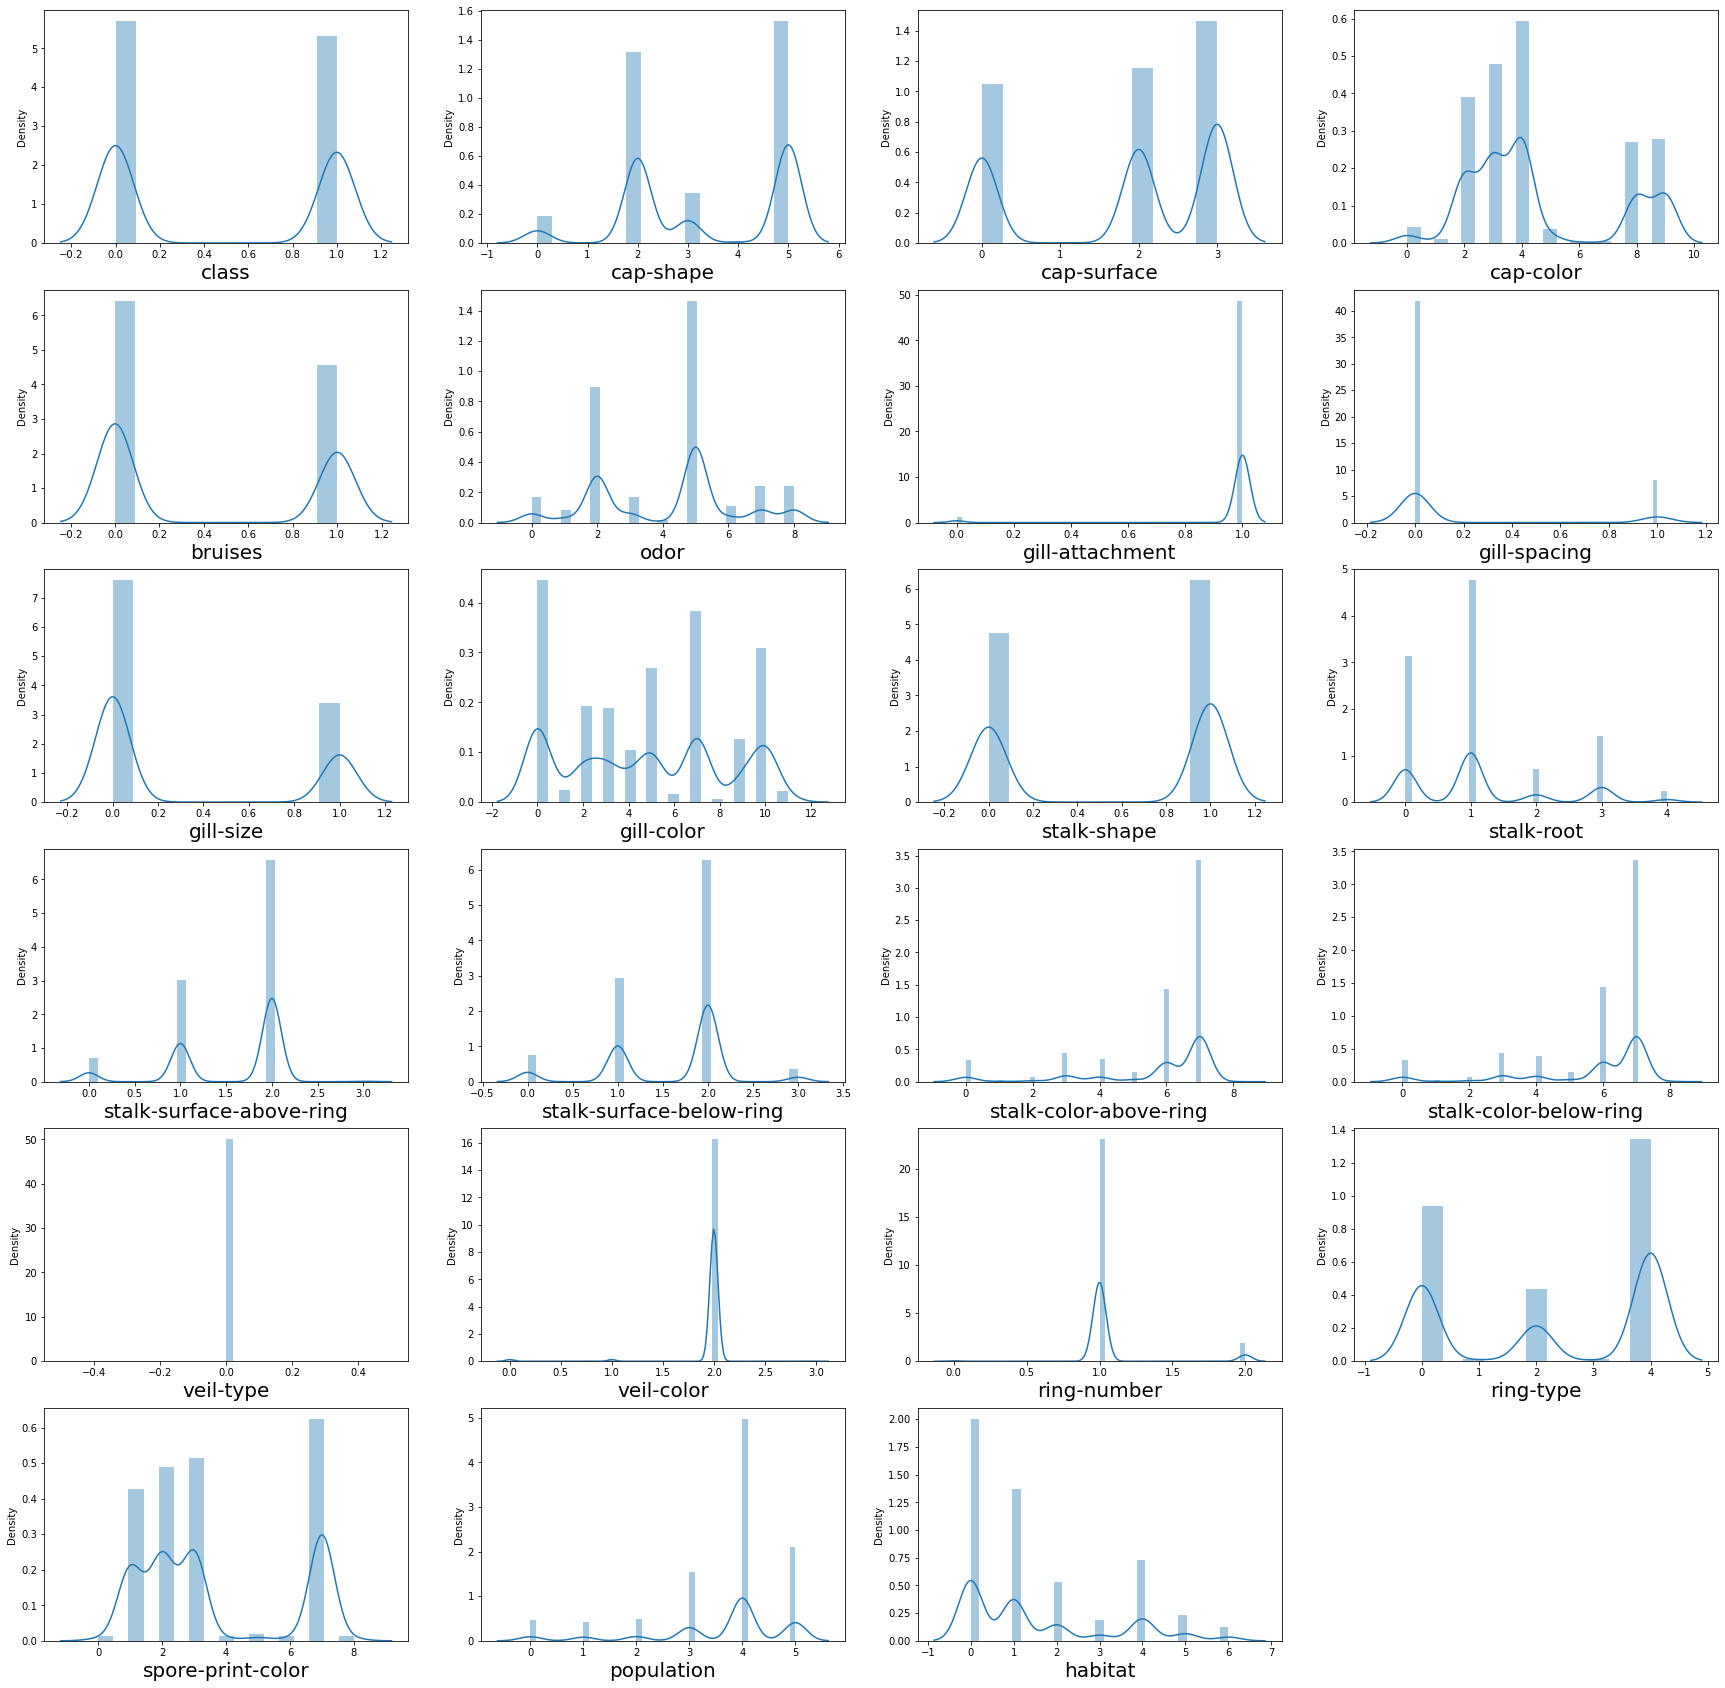

In [10]:
plt.figure(figsize=(30,30))
plotnumber=1
for column in data:
    if plotnumber<=23:
        ax=plt.subplot(6,4,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column, fontsize=20)
    plotnumber+=1
plt.show()

In [11]:
data=data.drop(columns='veil-type')
data

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,2,7,7,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,2,7,7,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,2,7,7,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,2,7,7,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,2,7,7,2,1,0,3,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0,3,2,4,0,5,0,0,0,11,...,2,2,5,5,1,1,4,0,1,2
8120,0,5,2,4,0,5,0,0,0,11,...,2,2,5,5,0,1,4,0,4,2
8121,0,2,2,4,0,5,0,0,0,5,...,2,2,5,5,1,1,4,0,1,2
8122,1,3,3,4,0,8,1,0,1,0,...,2,1,7,7,2,1,0,7,4,2


veil type is not contributing anything so we dropped it

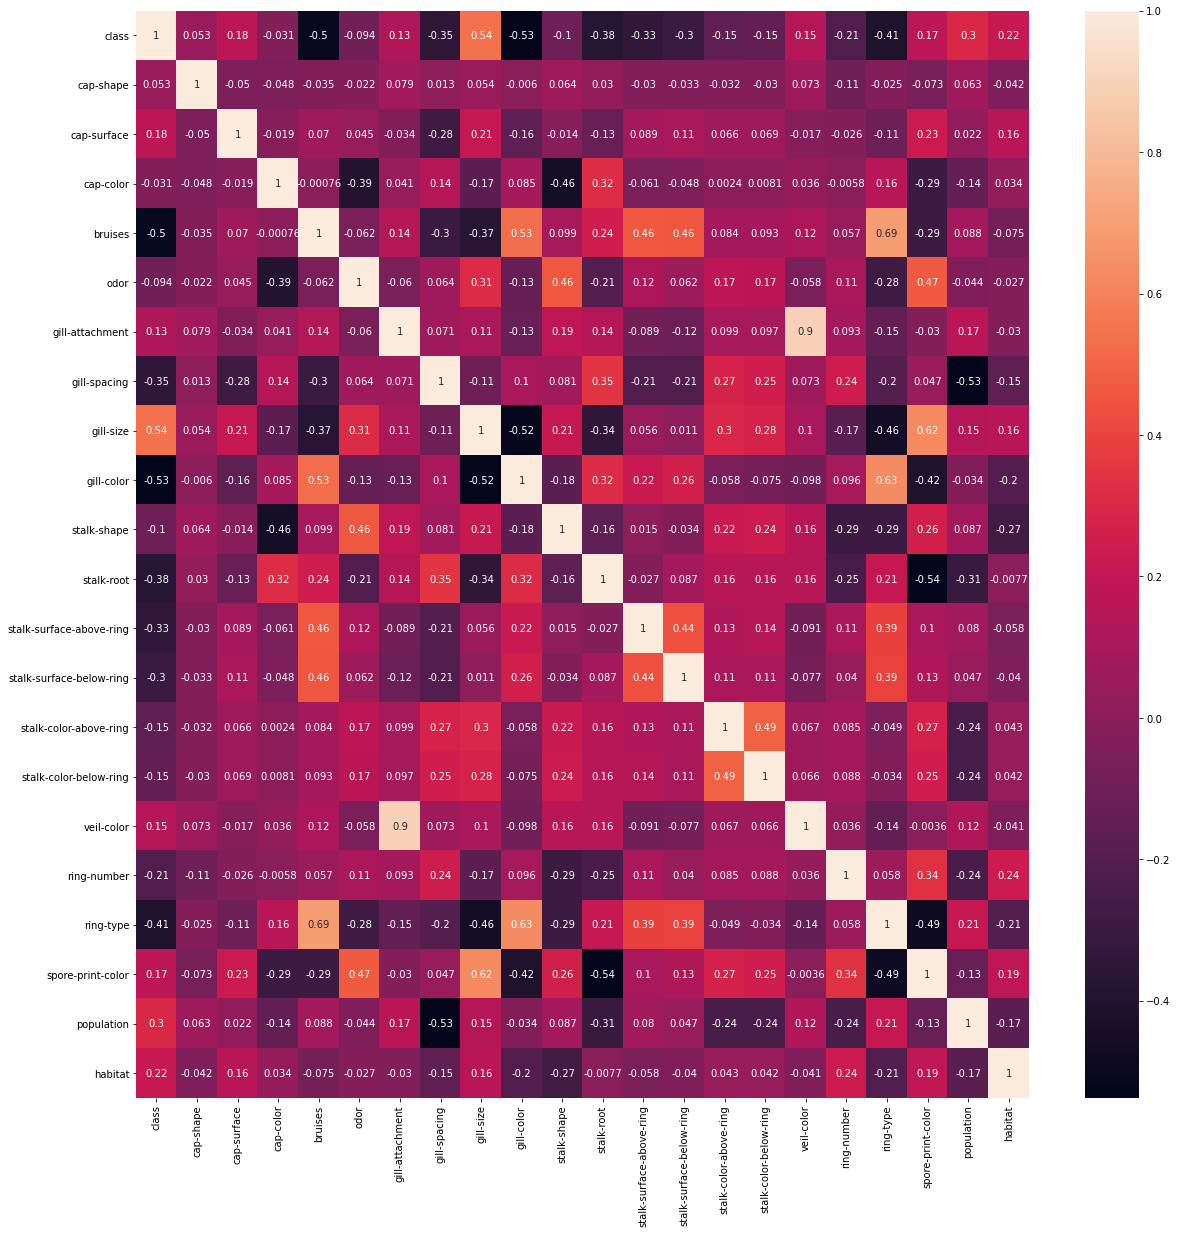

In [12]:
data_corr=data.corr()
plt.figure(figsize=(20,20))
sns.heatmap(data_corr,annot=True,annot_kws={'size':10})
plt.show()

gill attachment and veil color are strongly correlated that is 90%
so can plot a garph and recheck before deleteing any column

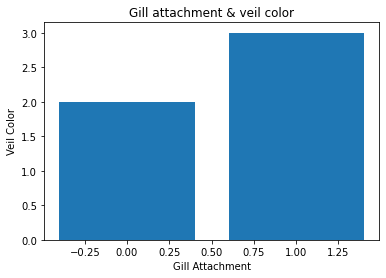

In [13]:
plt.bar(data['gill-attachment'],data['veil-color'])
plt.xlabel('Gill Attachment')
plt.ylabel('Veil Color')
plt.title('Gill attachment & veil color')
plt.show()

In [14]:
data=data.drop(columns=['veil-color'])
data

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,3,2,2,7,7,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,2,2,7,7,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,2,2,7,7,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,3,2,2,7,7,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,3,2,2,7,7,1,0,3,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0,3,2,4,0,5,0,0,0,11,...,0,2,2,5,5,1,4,0,1,2
8120,0,5,2,4,0,5,0,0,0,11,...,0,2,2,5,5,1,4,0,4,2
8121,0,2,2,4,0,5,0,0,0,5,...,0,2,2,5,5,1,4,0,1,2
8122,1,3,3,4,0,8,1,0,1,0,...,0,2,1,7,7,1,0,7,4,2


In [15]:
x=data.drop(columns=['class'])
y=data['class']

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=123)
y_train.head()

1727    0
7012    1
3249    0
2123    0
513     0
Name: class, dtype: int32

In [18]:
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier

In [19]:
clf=DecisionTreeClassifier()
clf.fit(x_train,y_train)

DecisionTreeClassifier()

In [20]:
clf.score(x_train,y_train)

1.0

In [21]:
clf.score(x_test,y_test)

1.0

In [22]:
 from sklearn.metrics import accuracy_score, confusion_matrix,classification_report,roc_curve,roc_auc_score

In [23]:
y_pred=clf.predict(x_test)
accuracy_score(y_test,y_pred)

1.0

In [24]:
classification_report(y_test,y_pred)

'              precision    recall  f1-score   support\n\n           0       1.00      1.00      1.00      1069\n           1       1.00      1.00      1.00       962\n\n    accuracy                           1.00      2031\n   macro avg       1.00      1.00      1.00      2031\nweighted avg       1.00      1.00      1.00      2031\n'

In [25]:
import pickle

In [28]:
filename='mushroom_model.pkl'


In [29]:
pickle.dump(clf,open('mushrrom_model.pkl','wb'))

conclusion

In [30]:
a=np.array(y_test)
predicted=np.array(clf.predict(x_test))
con=pd.DataFrame({'original':a,'predicted':predicted},index=range(len(a)))
con

,original,predicted
0,0,0
1,0,0
2,0,0
3,1,1
4,0,0
...,...,...
2026,1,1
2027,1,1
2028,0,0
2029,0,0


In [31]:
pwd


'C:\\Users\\FabHotels\\Practice Project'